In [1]:
from graphviz import Digraph

In [2]:
g = Digraph('G', filename='schematics_graph.gv', comment="Lens matching")
g.attr(compound='true', engine='neato', fontsize='22')
g.node_attr.update(shape='box')

In [3]:
seagle_color = '#4C558F'
gleam_color = '#ff9600'
input_color = '#ff7371'
node_attr = dict(style='filled,rounded', shape='box', margin='0.07, 0.05', fontsize='22')

# SEAGLE
with g.subgraph(name='cluster0') as c:
    c.attr(label='SEAGLE',
           style='filled', color=seagle_color, shape='box')
    c.node_attr.update(color='white', **node_attr)
    c.node('hydro', label='hydrodynamical simulations\n(EAGLE)', color=input_color)
    c.node('mdls', label='model variations')
    c.node('obs', label='observation-based priors', color=input_color)
    c.node('kproj', label='galaxy mass projections\n in x, y, z')
g.edges([('hydro', 'mdls'), ('mdls', 'kproj'), ('obs', 'kproj')])

# gleam
with g.subgraph(name='cluster1') as c:
    c.attr(label='gleam',
          style='filled', color=gleam_color, shape='box')
    c.node_attr.update(color='white', **node_attr)
    c.node('srcs', label='source deprojections')
    c.node('synths', label='synthetic images')
    c.node('mcmc', label='Bayesian MCMC')
g.edges([('srcs', 'synths'), ('synths', 'mcmc'), ('mcmc', 'srcs')])
g.edge('catalogue', 'srcs', lhead='cluster1')
g.edge('lenses', 'srcs', lhead='cluster1')

# gleam data inputs
g.node('lenses', label='lens observations', color=input_color, **node_attr)
node_attr['style'] = 'rounded'
g.node('catalogue', label='catalogue of\n convergence maps', **node_attr)

g.edge('kproj', 'catalogue', ltail='cluster0')

# gleam data outputs
g.node('matches', label='plausible lens matches', **node_attr)
g.edge('mcmc', 'matches', ltail='cluster1')
g.node('PDF', label='P(D | F)',  **node_attr)
g.edge('matches', 'PDF')

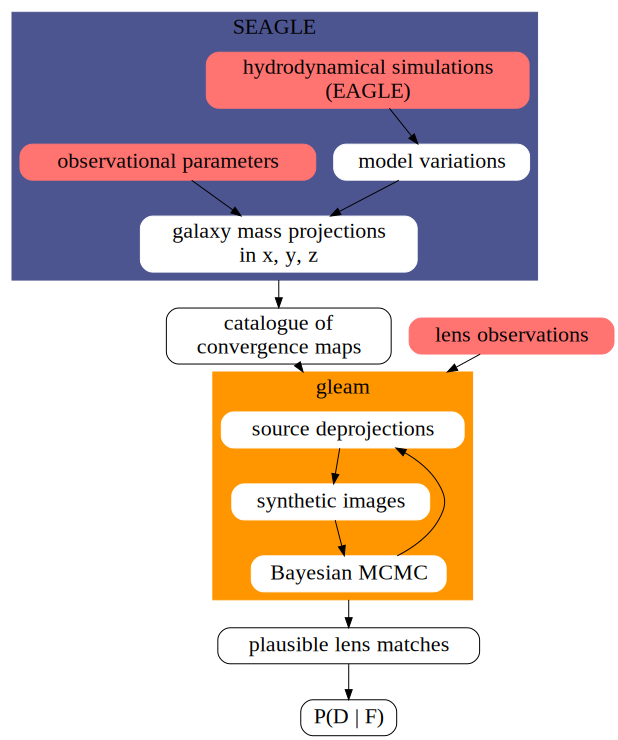

In [4]:
g


In [5]:
g.render('matching_schematics', view=False)


'matching_schematics.pdf'